In [1]:
# === STEP 1: Load dataset ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/pynew/Lib/Final Project New/US Airline Flight Routes and Fares 1993-2024.csv"


# Load dataset
# in class we used pd.read_csv(file_path).
# We add low_memory=False only to avoid the DtypeWarning message.
# We found it on StackOverflow:
# https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
df = pd.read_csv(file_path, low_memory=False)

df.head ()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [2]:
# Detailed info about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [3]:
# Count missing (NaN) values for each column, sort in descending order
missing_counts = df.isnull().sum().sort_values(ascending=False)

# Display the result
print("Missing values per column:")
print(missing_counts)

Missing values per column:
Geocoded_City1    39206
Geocoded_City2    39206
carrier_low        1612
lf_ms              1612
fare_low           1612
carrier_lg         1540
fare_lg            1540
large_ms           1540
city2                 0
citymarketid_2        0
city1                 0
quarter               0
Year                  0
tbl                   0
citymarketid_1        0
fare                  0
passengers            0
nsmiles               0
airport_2             0
airportid_2           0
airport_1             0
airportid_1           0
tbl1apk               0
dtype: int64


In [4]:
# Step 2: Drop irrelevant or redundant columns
columns_to_drop = ['tbl','tbl1apk','citymarketid_1','citymarketid_2',
                   'airportid_1','airportid_2','Geocoded_City1','Geocoded_City2']

df.drop(columns=columns_to_drop, inplace=True)

print("Dropped columns:", columns_to_drop)
print("Dataset shape after dropping:", df.shape)


Dropped columns: ['tbl', 'tbl1apk', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2', 'Geocoded_City1', 'Geocoded_City2']
Dataset shape after dropping: (245955, 15)


In [5]:
# ==  STEP 3: Data quality checks ===

# Missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Count duplicate rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Basic checks for invalid values
if "fare" in df.columns:
    print("fare <= 0:", (df["fare"] <= 0).sum())
if "passengers" in df.columns:
    print("passengers <= 0:", (df["passengers"] <= 0).sum())
if "nsmiles" in df.columns:
    print("nsmiles <= 0:", (df["nsmiles"] <= 0).sum())


Missing values per column:
Year              0
quarter           0
city1             0
city2             0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg     1540
large_ms       1540
fare_lg        1540
carrier_low    1612
lf_ms          1612
fare_low       1612
dtype: int64

Number of duplicated rows: 0
fare <= 0: 0
passengers <= 0: 7439
nsmiles <= 0: 0


In [7]:
# == STEP 4: More Data cleaning  ===

# We saw 7439 rows with passengers <= 0.
# These rows could be cargo flights or errors in the dataset.
# Since we focus on passenger flights, we remove them.

before = df.shape
df = df[df["passengers"] > 0]
after = df.shape
print("After removing passengers <= 0:", df.shape)

# Remove rows with missing values
# We saw NaN values in fare_lg, fare_low, lf_ms, carrier_lg, carrier_low, large_ms
df = df.dropna()

print("After dropping rows with NaN:", df.shape)

After removing passengers <= 0: (238516, 15)
After dropping rows with NaN: (237985, 15)


In [10]:
# === STEP 5: Quick stats and visualization ===

# Basic statistics of numeric columns
print("=== Describe numeric columns ===")
print(df.describe())

=== Describe numeric columns ===
                Year        quarter        nsmiles     passengers  \
count  237985.000000  237985.000000  237985.000000  237985.000000   
mean     2008.642465       2.481883    1189.605521     309.495888   
std         8.663600       1.122060     699.237081     516.893881   
min      1993.000000       1.000000     109.000000       1.000000   
25%      2001.000000       1.000000     632.000000      26.000000   
50%      2009.000000       2.000000    1023.000000     122.000000   
75%      2016.000000       3.000000    1733.000000     353.000000   
max      2024.000000       4.000000    2724.000000    8301.000000   

                fare       large_ms        fare_lg          lf_ms  \
count  237985.000000  237985.000000  237985.000000  237985.000000   
mean      216.880576       0.659914     217.174417       0.439449   
std        74.308634       0.221942      79.290532       0.327860   
min        50.410000       0.100000      50.410000       0.010000   


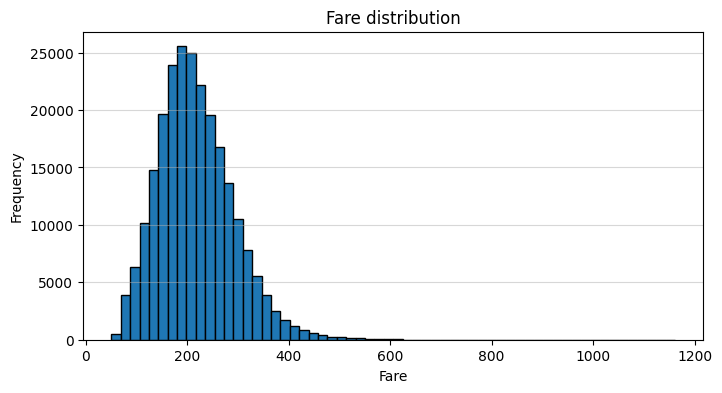

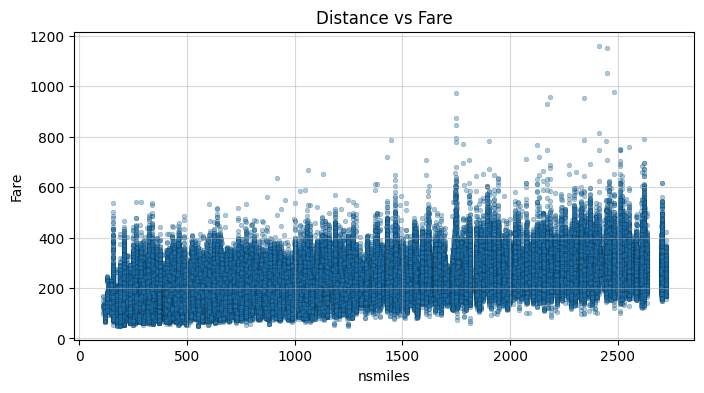

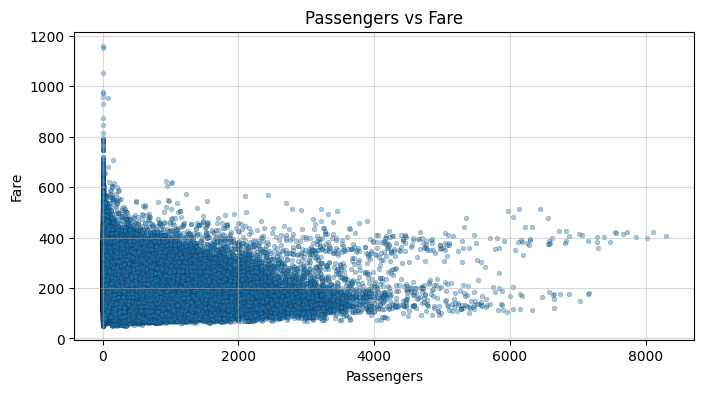

In [11]:
# Histogram of fares
plt.figure(figsize=(8,4))
plt.hist(df["fare"], bins=60, edgecolor="black")
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.5)
plt.show()

# Scatter: Distance (nsmiles) vs Fare
plt.figure(figsize=(8,4))
plt.scatter(df["nsmiles"], df["fare"], s=12, alpha=0.4, edgecolors="black", linewidths=0.2)
plt.title("Distance vs Fare")
plt.xlabel("nsmiles")
plt.ylabel("Fare")
plt.grid(True, alpha=0.5)
plt.show()

# Scatter: Passengers vs Fare
plt.figure(figsize=(8,4))
plt.scatter(df["passengers"], df["fare"], s=12, alpha=0.4, edgecolors="black", linewidths=0.2)
plt.title("Passengers vs Fare")
plt.xlabel("Passengers")
plt.ylabel("Fare")
plt.grid(True, alpha=0.5)
plt.show()


In [12]:
# ---- STEP 6: Save cleaned dataset ===
cleaned_path = "C:/pynew/Lib/Final Project New/US_Airline_Fares_Clean.csv"
df.to_csv(cleaned_path, index=False)

print("Cleaned dataset saved to:", cleaned_path)


Cleaned dataset saved to: C:/pynew/Lib/Final Project New/US_Airline_Fares_Clean.csv
